# 목차
### Part1. PCA(Principal Component Analysis) on USArrest
### Part2.K-means clustering on USArrest

# Part1. PCA(Principal Component Analysis) on USArrest

이번 과제는 다음과 같은 순서로 정리하였습니다. 
    1. 데이터 준비하기(불러와서 표준화하기)
    2. 싸이킷런의 PCA 활용하기
    3. 직접 PCA 구해보기
    4. 차원축소한 데이터 그래프에 그려보기
    5. Scree Plot 그려보기

In [170]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [31]:
pca = PCA()
scaler = StandardScaler()

## 1. 데이터 준비하기(불러와서 표준화하기)
50개 주에 대한 Murder, Assault, Urbanpop, Rape 등의 데이터가 있는 USArrests.csv 파일을 가져옵니다.

In [195]:
usarrests = pd.read_csv("USArrests.csv", index_col=0)
usarrests.head(10)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [196]:
usarrests.shape

(50, 4)

In [273]:
usarrests

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


#### 표준화하기

PCA를 하기 위해서는 우선 데이터를 표준화(standardize)하여 단위(scale)를 맞춰줘야 합니다. 이 과정을 거치지 않으면, 값이 큰 Assult 같은 변수로 PCA 결과가 편향될 수 있습니다. 표준화를 쉽게 할 수 있는 StandardScaler를 활용하겠습니다. 
- StandardScaler: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [76]:
usarrests_scaled = scaler.fit_transform(usarrests)

In [69]:
pd.DataFrame(usarrests_scaled).head(10)

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


## 2. 싸이킷런의 PCA 활용하기 
싸이킷런의 PCA를 활용하면 쉽게 PCA를 해볼 수 있습니다.  

In [197]:
# from sklearn.decomposition import PCA

In [212]:
pca.fit(usarrests)
usarrests_pca = pca.fit_transform(usarrests_scaled)

In [204]:
pd.DataFrame(pca.components_.T,
             index=usarrests.columns,
             columns=['PC' + str(i+1) for i in range(len(pca.components_))])

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [213]:
pd.DataFrame(usarrests_pca)
# pca.components에 원본 데이터를 곱해서 subspace로 데이터를 옮긴 결과. 

,0,1,2,3
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996
5,1.514563,-0.987555,1.095007,0.001465
6,-1.358647,-1.088928,-0.643258,-0.118469
7,0.047709,-0.325359,-0.718633,-0.881978
8,3.013042,0.039229,-0.576829,-0.096285
9,1.639283,1.278942,-0.342460,1.076797


## 2. 직접 PCA 구해보기
1. 공분산 행렬 구하기
2. 공분산 행렬의 고유값 및 고유벡터 구하기(Eigen Decomposition or SVD 이용)
3. 고유값 보고 주성분 확인하기
4. 고유벡터에 원데이터 사영(project)하기

**Reference:**
 - http://rfriend.tistory.com/185
 - https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
 - https://ratsgo.github.io/machine%20learning/2017/04/24/PCA/

In [108]:
from numpy import array
from numpy.linalg import eig, svd

In [102]:
X = usarrests_scaled # scaled usarrests dataset

### Step1. 공분산 행렬 구하기

In [129]:
cov_X = cov(X.T)
print(V)

[[1.02040816 0.81823807 0.07099247 0.57508044]
 [0.81823807 1.02040816 0.2641548  0.67881758]
 [0.07099247 0.2641548  1.02040816 0.41973595]
 [0.57508044 0.67881758 0.41973595 1.02040816]]


### Step2. 공분산 행렬의 고유값 및 고유벡터 구하기
#### 방법1) np.linalg.eig 이용하기
파이썬에서 고유값을 구하려면 numpy의 eig() 혹은 svd()를 이용해야 합니다. eig를 이용하면 행렬의 고유값과 고유벡터를 구할 수 있습니다. 

In [130]:
e_values, e_vectors = eig(cov_X)
print(e_values)
print(e_vectors)

[2.53085875 1.00996444 0.17696948 0.36383998]
[[ 0.53589947  0.41818087  0.6492278  -0.34123273]
 [ 0.58318363  0.1879856  -0.74340748 -0.26814843]
 [ 0.27819087 -0.87280619  0.13387773 -0.37801579]
 [ 0.54343209 -0.16731864  0.08902432  0.81777791]]


#### 방법2) np.linalg.svd 이용하기

svd()를 이용하면 행렬A를 다음과 같은 세 가지 구성으로 분해해줍니다.
\begin{equation}
A = U \Sigma V^T
\end{equation}

- U = AA^T 고유벡터
- V^T = A^TA의 고유벡터 
- Sigma = AA^T와 A^TA의 고유값의 제곱근(=특이값, singular value), 즉 A의 고유값을 대각원소로 가지고 나머지는 0인 대각행렬


In [133]:
U, Sigma, V_t = svd(cov_X)
print(U)
print(Sigma)
print(V_t)

[[-0.53589947  0.41818087 -0.34123273  0.6492278 ]
 [-0.58318363  0.1879856  -0.26814843 -0.74340748]
 [-0.27819087 -0.87280619 -0.37801579  0.13387773]
 [-0.54343209 -0.16731864  0.81777791  0.08902432]]
[2.53085875 1.00996444 0.36383998 0.17696948]
[[-0.53589947 -0.58318363 -0.27819087 -0.54343209]
 [ 0.41818087  0.1879856  -0.87280619 -0.16731864]
 [-0.34123273 -0.26814843 -0.37801579  0.81777791]
 [ 0.6492278  -0.74340748  0.13387773  0.08902432]]


### Step3. 고유값 보고 주성분 확인하기

고유값(eig의 e_values 또는 svd의 Sigma)를 확인해보면, 순서만 다르고, 똑같은 결과가 나옴을 확인할 수 있습니다. 

In [134]:
print(e_values)
print(Sigma)

[2.53085875 1.00996444 0.17696948 0.36383998]
[2.53085875 1.00996444 0.36383998 0.17696948]


### Step4. 로딩벡터에 원 데이터 곱하여 데이터 차원 축소하기 
공분산행렬의 고유벡터는 원 데이터 X의 분산을 최대화해주는, PCA의 principal component loading값에 해당합니다. 로딩값 제곱의 합은 1로 제약을 두고 구해집니다. 확인해보겠습니다. 

In [199]:
(pd.DataFrame(e_vectors) ** 2).sum()

0    1.0
1    1.0
2    1.0
3    1.0
dtype: float64

또한, 위에서 pca()를 활용해 구한 pca.components_ 와 고유벡터가 같은 것을 확인할 수 있습니다. 고유값이 큰 상위 k개의 로딩 벡터를 선택하여, 여기에 원 데이터를 곱하게 되면(사영, projection)하게 되면, 차원이 축소된 데이터의 행렬을 구할 수 있습니다. 

\begin{align*} \overrightarrow { { \alpha  }_{ p} } &= {eigen vector} \\
\overrightarrow { { z }_{ 11 } }, \overrightarrow { { z }_{ 21 } }, ..., \overrightarrow { { z }_{ n1 } } &= {PC1 scores} \\
\overrightarrow { { z }_{ 11 } } &={ \alpha  }_{ 11 }\overrightarrow { { x }_{ i1 } } +{ \alpha  }_{ 21 }\overrightarrow { { x }_{ i2 } } +...+{ \alpha  }_{ p1 }\overrightarrow { { x }_{ ip } } \\
\end{align*}

In [163]:
print(e_values)

[2.53085875 1.00996444 0.17696948 0.36383998]


In [164]:
pd.DataFrame(e_vectors,
             index=usarrests.columns,
             columns=['PC' + str(i+1) for i in range(len(e_vectors))])

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,0.649228,-0.341233
Assault,0.583184,0.187986,-0.743407,-0.268148
UrbanPop,0.278191,-0.872806,0.133878,-0.378016
Rape,0.543432,-0.167319,0.089024,0.817778


첫번째, 두 번째 고유값이 가장 크게 나타남을 확인할 수 있습니다. 따라서 고유벡터에서 PC1, PC2에 해당하는 벡터만 가져와 데이터를 사영하면 데이터를 2차원으로 축소할 수 있을 것입니다.

In [167]:
pc1n2 = e_vectors[:,:2]
pc1n2

array([[ 0.53589947,  0.41818087],
       [ 0.58318363,  0.1879856 ],
       [ 0.27819087, -0.87280619],
       [ 0.54343209, -0.16731864]])

In [168]:
Projected_X_2D = pc1n2.T.dot(X.T)
pd.DataFrame(Projected_X_2D.T)

,0,1
0,0.985566,1.133392
1,1.950138,1.073213
2,1.763164,-0.745957
3,-0.141420,1.119797
4,2.523980,-1.542934
5,1.514563,-0.987555
6,-1.358647,-1.088928
7,0.047709,-0.325359
8,3.013042,0.039229
9,1.639283,1.278942


## 4. 차원축소한 데이터 그래프에 그려보기
이를 2차원 그래프에 표현하면 다음과 같이 나타납니다. 
- Reference: https://nbviewer.jupyter.org/github/emredjan/ISL-python/blob/master/labs/lab_10.4_principal_components_analysis.ipynb

In [190]:
xvector = e_vectors.T[0] 
yvector = -e_vectors.T[1]
pc1 = Projected_X_2D[0]
pc2 = -Projected_X_2D[1]

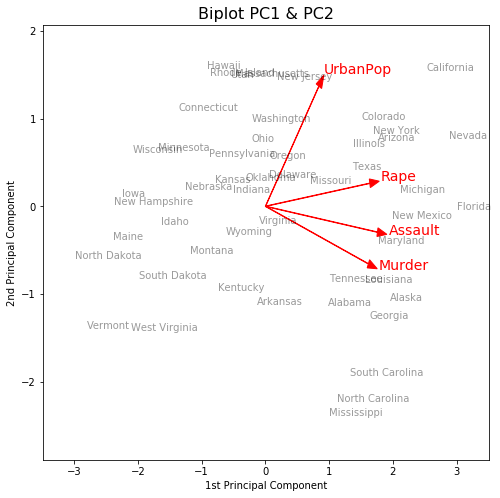

In [327]:
plt.figure(figsize=(8, 8))
plt.title('Biplot PC1 & PC2', size=16)    
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
m = 0.5
plt.xlim(min(pc1) - m, max(pc1) + m)
plt.ylim(min(pc2) - m, max(pc2) + m)

for i in range(len(pc1)):
    plt.text(pc1[i], pc2[i], usarrests.index[i], color='black', alpha=0.4)
    
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(pc1), yvector[i]*max(pc2),
              color='r', width=0.005, head_width=0.1)
    plt.text(xvector[i]*max(pc1)*1.1, yvector[i]*max(pc2)*1.1,
             usarrests.columns[i], color='r', size=14)

## 5. Scree Plot 그려보기
지금은 변수가 많지 않아 (즉, 원본 데이터의 차원이 높지 않아) 적절한 수준으로 데이터의 차원을 축소할 수 있는 주성분의 수를 금방 알 수 있었지만, 변수가 많아지면 이런 방식으로 파악하기 어렵습니다. 각각의 주성분이 전체 분산에서 어느 정도를 설명하는지 보고, 설명량이 급격히 줄어드는 지점에서 주성분의 수를 결정하면 보다 정확한 결정을 할 수 있습니다. 

싸이킷런의 pca에서는 각각의 주성분이 설명하는 분산의 비율을 아래와 같이 계산해줍니다. 

In [218]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.62006039 0.24744129 0.0891408  0.04335752]


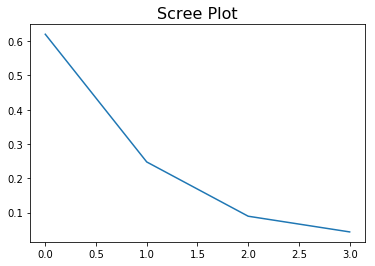

In [226]:
plt.title('Scree Plot', size=16)   
plt.plot(explained_variance)

주성분이 2개가 되는 지점에서 설명량이 급격히 줄어드는 것을 알 수 있습니다. 누적 설명량과 누적 scree plot을 그려보면 아래와 같습니다. 

In [219]:
cum_exp_var =np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(cum_exp_var)

[ 62.01  86.75  95.66 100.  ]


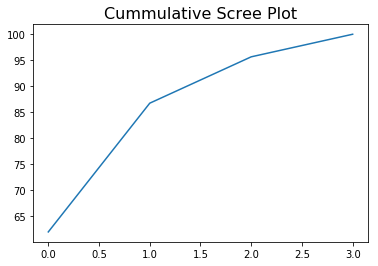

In [227]:
plt.title('Cummulative Scree Plot', size=16)   
plt.plot(cum_exp_var)

# Part2. K-means clustering on USArrest

이 부분은 다음과 같은 순서로 정리하였습니다. 
    1. 4차원일 때 Kmeans를 통한 군집화
    2. 2차원으로 축소한 후 다시 kmeans를 돌려 군집화

In [321]:
from sklearn.cluster import KMeans

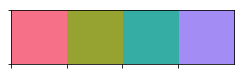

In [340]:
import seaborn as sns
color_p = sns.color_palette("husl", 4)
sns.palplot(color_p)

## 1. 4차원일 때 Kmeans를 통한 군집화

원본데이터를 표준화했던 usarrests_scaled 데이터는 변수가 4개인 4차원의 데이터입니다. 이 데이터를 가지고 k=2,3,4인 경우의 k-means 군집화를 각각 해보고 그래프를 그려보겠습니다. 

먼저, k=4로 정하여 군집화를 해보면 다음과 같은 결과가 나옵니다. 

In [282]:
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=20)
kmeans_4.fit(usarrests_scaled)
k_4 = kmeans_4.labels_

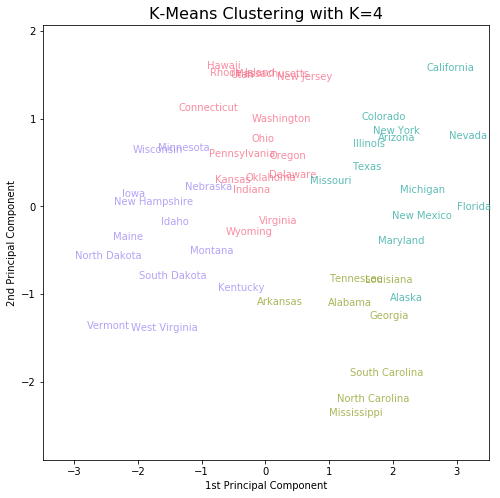

In [349]:
plt.figure(figsize=(8, 8))
plt.title('K-Means Clustering with K=4', size=16)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
m = 0.5
plt.xlim(min(pc1) - m, max(pc1) + m)
plt.ylim(min(pc2) - m, max(pc2) + m)
for i in range(len(pc1)):
    plt.text(pc1[i], pc2[i], usarrests.index[i], color=color_p[k_4[i]], alpha=0.8)

각 클러스터의 변수별 평균값을 정리해보면 다음과 같습니다.
- 분홍색: 0번 그룹. 도시 규모는 큰 편에 속하며(PC2 상단에 위치), 규모가 비슷한 다른 도시 클러스터(2번, 청록색) 보다 범죄는 적게 일어난다(PC1 왼쪽에 위치)
- 국방색: 1번 그룹. 도시 규모는 작은 편에 속하며(PC2 하단에 위치), 규모가 비슷한 다른 도시 클러스터(3번, 보라색)보다 범죄는 많이 일어난다(PC1 우측에 위치)
- 청록색: 2번 그룹. 도시 규모는 큰 편에 속하며(PC2 상단에 위치), 규모가 비슷한 다른 도시 클러스터(0번, 분홍색) 보다 범죄는 많이 일어난다(PC1 우측에 위치)
- 보라색: 3번 그룹. 도시 규모는 작은 편에 속하며(PC2 하단에 위치), 규모가 비슷한 다른 도시 클러스터(1번, 국방색)보다 범죄는 적게 일어난다(PC1 좌측에 위치)

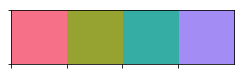

In [341]:
sns.palplot(color_p)

In [347]:
usarrests["K_4"] = k_4
usarrests.groupby(['K_4']).mean()

,Murder,Assault,UrbanPop,Rape
K_4,,,,
0,5.656250,138.875000,73.875000,18.781250
1,13.937500,243.625000,53.750000,21.412500
2,10.815385,257.384615,76.000000,33.192308
3,3.600000,78.538462,52.076923,12.176923


In [350]:
# usarrests

In [276]:
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=20)
kmeans_3.fit(usarrests_scaled)
k_3 = kmeans_3.labels_

In [361]:
usarrests["K_3"] = k_3
usarrests.groupby(['K_3']).mean()

,Murder,Assault,UrbanPop,Rape,K_4
K_3,,,,,
0,5.656250,138.875,73.875000,18.78125,0.000000
1,12.165000,255.250,68.400000,29.16500,1.650000
2,3.971429,86.500,51.928571,12.70000,2.857143


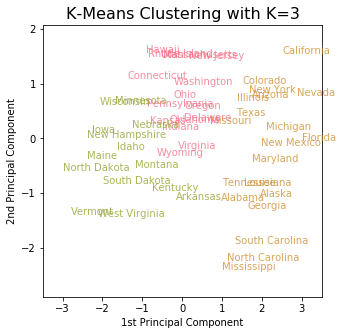

In [305]:
plt.figure(figsize=(5, 5))
plt.title('K-Means Clustering with K=3', size=16)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
m = 0.5
plt.xlim(min(pc1) - m, max(pc1) + m)
plt.ylim(min(pc2) - m, max(pc2) + m)
for i in range(len(pc1)):
    plt.text(pc1[i], pc2[i], usarrests.index[i], color=color_p[k_3[i]], alpha=0.8)

클러스터를 2로 놓게 되면 인구규모는 비슷하지만, 범죄율에 있어서 차이가 나타나는 두 그룹으로 클러스터링 되었습니다. 

In [277]:
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=20)
kmeans_2.fit(usarrests_scaled)
k_2 = kmeans_2.labels_

In [362]:
usarrests["K_2"] = k_2
usarrests.groupby(['K_2']).mean()

,Murder,Assault,UrbanPop,Rape,K_4,K_3
K_2,,,,,,
0,4.870,114.433333,63.633333,15.943333,1.333333,0.933333
1,12.165,255.250000,68.400000,29.165000,1.650000,1.000000


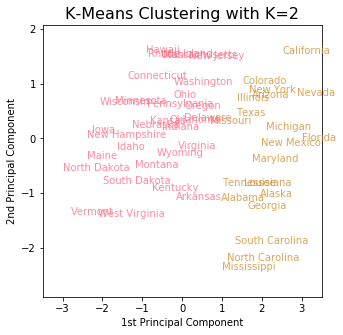

In [306]:
plt.figure(figsize=(5, 5))
plt.title('K-Means Clustering with K=2', size=16)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
m = 0.5
plt.xlim(min(pc1) - m, max(pc1) + m)
plt.ylim(min(pc2) - m, max(pc2) + m)
for i in range(len(pc1)):
    plt.text(pc1[i], pc2[i], usarrests.index[i], color=color_p[k_2[i]], alpha=0.8)

### 2. 2차원으로 축소한 후 다시 kmeans를 돌려 군집화
2차원으로 축소했던 데이터 Projected_X_2D를 두고 k=2로 설정하여 군집화한 결과, 4차원 데이터에서 k=2로 두고 군집화한 결과와 동일한 결과가 나왔습니다. 

In [316]:
kmeans_X2D = KMeans(n_clusters=2, random_state=42, n_init=20)
kmeans_X2D.fit(Projected_X_2D.T)
k_X2D = kmeans_X2D.labels_

In [317]:
k_X2D

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

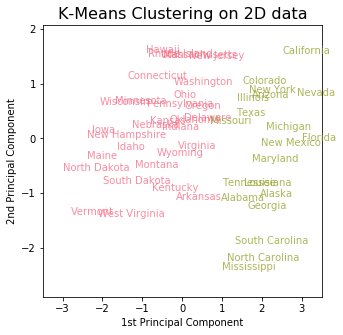

In [363]:
plt.figure(figsize=(5, 5))
plt.title('K-Means Clustering on 2D data', size=16)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
m = .5
plt.xlim(min(pc1) - m, max(pc1) + m)
plt.ylim(min(pc2) - m, max(pc2) + m)
for i in range(len(pc1)):
    plt.text(pc1[i], pc2[i], usarrests.index[i], color=color_p[k_X2D[i]], alpha=0.8)